#toy_notebook_fr


March 28, 2019

## 1 À propos du calcul de π

### 1.1 En demandant à la lib maths

Mon ordinateur m’indique que *π* vaut *approximativement*


In [6]:
from math import pi
print(pi)

3.141592653589793


## 1.2 En utilisant la méthode des aiguilles de Buffon

Mais calculé avec la **méthode** des [aiguilles de Buffon] (https://fr.wikipedia.org/wiki/Aiguille_de_Buffon), on obtiendrait comme **approximation** :


In [7]:
import numpy as np
np.random.seed(seed=42)
N = 10000
x = np.random.uniform(size=N, low=0, high=1)
theta = np.random.uniform(size=N, low=0, high=pi/2)
2/(sum((x+np.sin(theta))>1)/N)

3.128911138923655

## 1.3 Avec un argument "fréquentiel" de surface


Sinon, une méthode plus simple à comprendre et ne faisant pas intervenir d’appel à la fonction sinussebasesurlefaitquesiX∼U(0,1)etY∼U(0,1)alorsP[X2+Y2 ≤1]=π/4(voir [méthode de Monte Carlo sur Wikipedia] (https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo#D%C3%A9termination_de_la_valeur_de_%CF%80)). Le code suivant illustre ce fait :


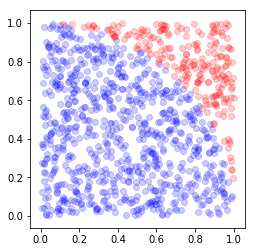

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(seed=42)
N = 1000
x = np.random.uniform(size=N, low=0, high=1)
y = np.random.uniform(size=N, low=0, high=1)
accept = (x*x+y*y) <= 1
reject = np.logical_not(accept)
fig, ax = plt.subplots(1)
ax.scatter(x[accept], y[accept], c='b', alpha=0.2, edgecolor=None)
ax.scatter(x[reject], y[reject], c='r', alpha=0.2, edgecolor=None)
ax.set_aspect('equal')


Il est alors aisé d’obtenir une approximation (pas terrible) de π en comptant combien de fois, en moyenne, X2 + Y2 est inférieur à 1 :


In [10]:
4*np.mean(accept)

3.112